# Classification

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

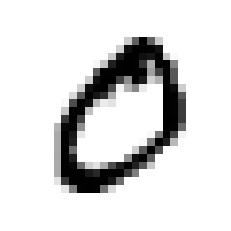

In [2]:
X,y = mnist["data"], mnist["target"]

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [3]:
import numpy as np
y = y.astype(np.uint8)

In [4]:
X_train, X_test , y_train , y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Binary Classifier

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:

sgd_clf.predict([X[11]])

array([ True])

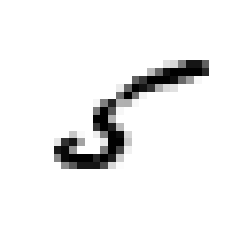

In [49]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit(X[11])

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv = 5 , scoring = "accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

Never 5 Classifier

In [5]:
from sklearn.base import BaseEstimator

class Never5(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)

In [6]:
never_5 = Never5()
cross_val_score(never_5, X_train, y_train_5, cv = 5 ,scoring = "accuracy")

NameError: name 'cross_val_score' is not defined

# Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("High Precision(means low FP): ",precision_score(y_train_5, y_train_pred))
print("Low Recall(means high FN): ",recall_score(y_train_5, y_train_pred))
print("F1 Score:",f1_score(y_train_5, y_train_pred))

In [ ]:
y_scores = sgd_clf.decision_function([X[1]])
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3 , method = "decision_function")


array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [42]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

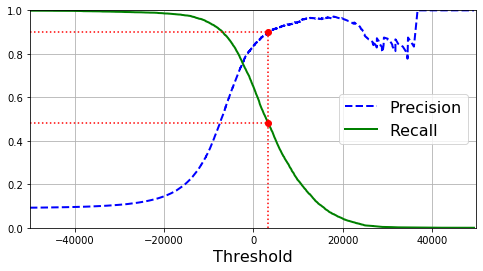

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")    
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")    
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")  
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown                                           # Not shown
plt.show()

In [60]:
y_train_pred_90 = (y_scores > threshold_90_precision)
print("precision:",precision_score(y_train_5,y_train_pred_90))
print("recall:",recall_score(y_train_5,y_train_pred_90))

precision: 0.9
recall: 0.47980077476480354


In [57]:
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]

-106527.45300471177

In [86]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)


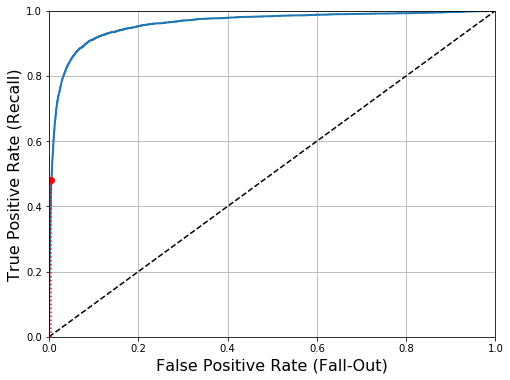

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [76]:
y_train_5.size

60000

In [79]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5, cv = 3 , method = "predict_proba")

In [90]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

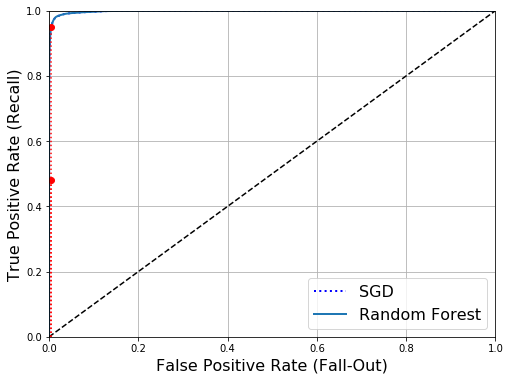

In [92]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [96]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [98]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [99]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Multi Class 

In [102]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:1000], y_train[:1000]) 
svm_clf.predict([X_train[0]])


array([5], dtype=uint8)

In [111]:
some_digit_scores = svm_clf.decision_function([some_digit])
np.argmax(some_digit_scores)
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [114]:
from sklearn.multiclass import OneVsOneClassifier
ovr_clf = OneVsOneClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([0], dtype=uint8)

In [115]:
ovr_clf.estimators_

(SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
     verbose=

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [118]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train)


In [119]:
conf_matrix= confusion_matrix(y_train_pred,y_train)
conf_matrix

array([[5570,    0,   26,   26,   10,   26,   26,   20,   16,   21],
       [   0, 6408,   25,   18,   13,   18,   17,   11,   58,   19],
       [  15,   41, 5220,  107,   36,   23,   41,   52,   37,   28],
       [   3,   21,   85, 5187,    9,  155,    2,   23,   88,   58],
       [   9,    3,   67,    0, 5183,   51,   40,   48,    2,  119],
       [  39,   41,   24,  184,   10, 4401,   83,   11,  119,   30],
       [  33,    4,   62,   24,   34,   77, 5548,    3,   28,    1],
       [   5,    7,   37,   39,   20,   13,    7, 5685,    8,  170],
       [ 248,  208,  401,  483,  381,  596,  154,  217, 5459,  429],
       [   1,    9,   11,   63,  146,   61,    0,  195,   36, 5074]],
      dtype=int64)

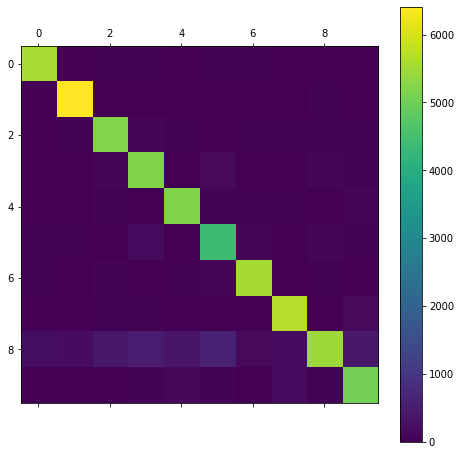

In [122]:
#from sklearn.metrics import plot_confusion_matrix 
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
plot_confusion_matrix(conf_matrix)

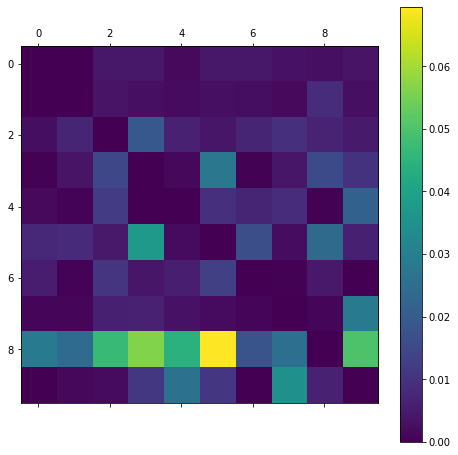

In [125]:
rows_sum = conf_matrix.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_matrix/rows_sum
np.fill_diagonal(norm_conf_mx,0)
plot_confusion_matrix(norm_conf_mx)

In [128]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

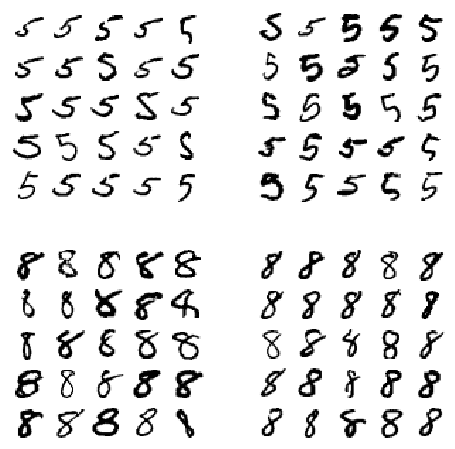

In [130]:
cl_a, cl_b = 5, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()

# Multilablel Classification

In [139]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [140]:
knn_clf.predict([some_digit])

array([[False, False]])

In [141]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

KeyboardInterrupt: 

# Multioutput Classifier

In [142]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [147]:
noise

array([[71, 29, 29, ..., 38, 65,  6],
       [33, 74, 71, ..., 50, 46,  1],
       [ 0,  2, 51, ..., 35, 56, 82],
       ...,
       [92, 14, 21, ..., 33, 16, 69],
       [45, 55, 99, ...,  2, 91, 76],
       [63, 92, 91, ..., 21, 25, 94]])

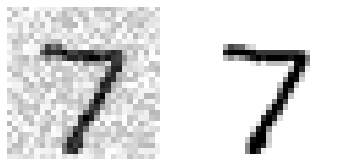

In [148]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
#save_fig("noisy_digit_example_plot")
plt.show()

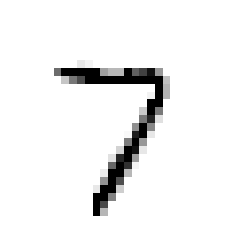

In [149]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

Problem 1 : Classifier with 97% Accuracy

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train[:10000],y_train[:10000])

y_pred = cross_val_predict(knn_clf, X_train[:10000],y_train[:10000], cv = 3)

In [26]:
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import GridSearchCV
precision_score(y_pred, y_train[:10000],average="macro")
#y_pred == y_train[:10000]

0.9314706244679998

In [38]:
hyperparameters = [{'n_neighbors' : [3,4,5] , 'weights' : ['uniform', 'distance']}]

grid_search = GridSearchCV(knn_clf , hyperparameters, cv = 3, verbose =3)
grid_search.fit(X_train[0:10000], y_train[0:10000])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.939, total=  48.2s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.1s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.942, total=  33.1s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.925, total=  33.1s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.943, total=  32.1s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.945, total=  31.7s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.928, total=  31.4s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.938, total=  31.8s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.945, total=  31.6s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.921, total=  31.6s
[CV] n_neighbors=4, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  9.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print((mean_score), params)

0.935399658742119 {'n_neighbors': 3, 'weights': 'uniform'}
0.9384995788121104 {'n_neighbors': 3, 'weights': 'distance'}
0.9347997187241219 {'n_neighbors': 4, 'weights': 'uniform'}
0.9397994088551026 {'n_neighbors': 4, 'weights': 'distance'}
0.9331998286811286 {'n_neighbors': 5, 'weights': 'uniform'}
0.9369998487551214 {'n_neighbors': 5, 'weights': 'distance'}


In [46]:
grid_search.best_params_


{'n_neighbors': 4, 'weights': 'distance'}

Problem 2 : Shift Image and add shifted images as training data

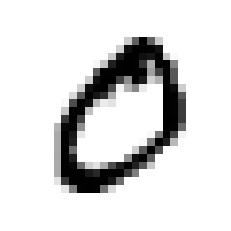

In [50]:
imag = X_train[1]
plot_digit(imag)

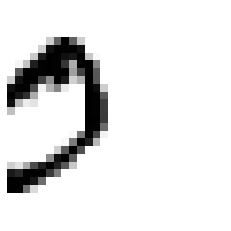

In [58]:
plot_digit(shift(X_train[1].reshape(28,28),[0,-10]))

In [127]:
from scipy.ndimage.interpolation import shift
def shift_image(direction,image):
    image = image.reshape(28,28)
    if(direction == 'left'):
        im = shift(image,[0,-10/2])
    if(direction == 'right'):
        im = shift(image,[0,10/2])
    if(direction == 'up'):
        im = shift(image,[-10/2,0])
    if(direction == 'down'):
        im = shift(image,[10/2,0])
    return im.reshape(784)

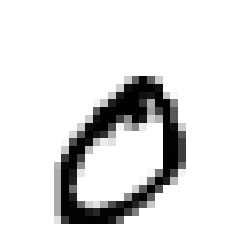

In [128]:
i = shift_image('down',X_train[1])
plot_digit(i)

In [166]:
c = 0
X_transformed = np.zeros((len(X_train),3920))
X_transformed[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [167]:
for i in X_train:
    i = np.concatenate((i,shift_image('down',i),shift_image('up',i),shift_image('left',i),shift_image('right',i)))
    X_transformed[c] = i
    c = c+1
#shift_image('down',X[1]).shape
#image.shape

In [170]:
knn_clf.fit(X_transformed[0:10000],y_train[0:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [176]:
y_pred = cross_val_predict(knn_clf,X_transformed[:10000],y_train[:10000],cv = 3,verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.2min finished


In [177]:
precision_score(y_pred,y_train[0:10000],average = 'macro')

0.932165844916573